<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-2:-Image-Processing" data-toc-modified-id="Project-2:-Image-Processing-1">Project 2: Image Processing</a></span></li><li><span><a href="#Learning-Outcomes" data-toc-modified-id="Learning-Outcomes-2">Learning Outcomes</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#By-the-end-of-this-project,-you-should-be-able-to:" data-toc-modified-id="By-the-end-of-this-project,-you-should-be-able-to:-2.0.1">By the end of this project, you should be able to:</a></span></li></ul></li></ul></li><li><span><a href="#3-different-libraries-to-view-images" data-toc-modified-id="3-different-libraries-to-view-images-3">3 different libraries to view images</a></span></li><li><span><a href="#BYI-(Bring-Your-Images)" data-toc-modified-id="BYI-(Bring-Your-Images)-4">BYI (Bring Your Images)</a></span></li><li><span><a href="#Task-1.-Flipping-an-image-horizontally" data-toc-modified-id="Task-1.-Flipping-an-image-horizontally-5">Task 1. Flipping an image horizontally</a></span><ul class="toc-item"><li><span><a href="#3-Useful-Image-attributes-and-methods" data-toc-modified-id="3-Useful-Image-attributes-and-methods-5.1">3 Useful Image attributes and methods</a></span></li></ul></li><li><span><a href="#Task-2.-Blurring" data-toc-modified-id="Task-2.-Blurring-6">Task 2. Blurring</a></span><ul class="toc-item"><li><span><a href="#Blurring-function" data-toc-modified-id="Blurring-function-6.1">Blurring function</a></span></li><li><span><a href="#Image-regions" data-toc-modified-id="Image-regions-6.2">Image regions</a></span></li><li><span><a href="#Safely-examining-region-pixels" data-toc-modified-id="Safely-examining-region-pixels-6.3">Safely examining region pixels</a></span></li></ul></li><li><span><a href="#Task-3.-Removing-noise" data-toc-modified-id="Task-3.-Removing-noise-7">Task 3. Removing noise</a></span></li><li><span><a href="#Task-4.-Re-factoring-to-improve-code-quality" data-toc-modified-id="Task-4.-Re-factoring-to-improve-code-quality-8">Task 4. Re-factoring to improve code quality</a></span></li><li><span><a href="#Task-5.-Highlighting-image-edges" data-toc-modified-id="Task-5.-Highlighting-image-edges-9">Task 5. Highlighting image edges</a></span></li></ul></div>

Project 2: Image Processing
-----

Learning Outcomes
----

#### By the end of this project, you should be able to:

- Work with image data in Python.
- Apply your knowledge of Python: assignments, expressions, if and loop statements, functions, lists, and libraries. 
- Write the following image processing functions from scratch:
    1. Flipping horizontally
    1. Blurring
    1. Removing salt-and-pepper image noise
    1. Finding edges within images

In [657]:
reset -fs

In [658]:
# Define file location

from pathlib import Path

p = Path('./images') 
file_location = p / "lambda_puppy.png"

3 different libraries to view images
------

1. IPython
1. PIL
1. matplotlib

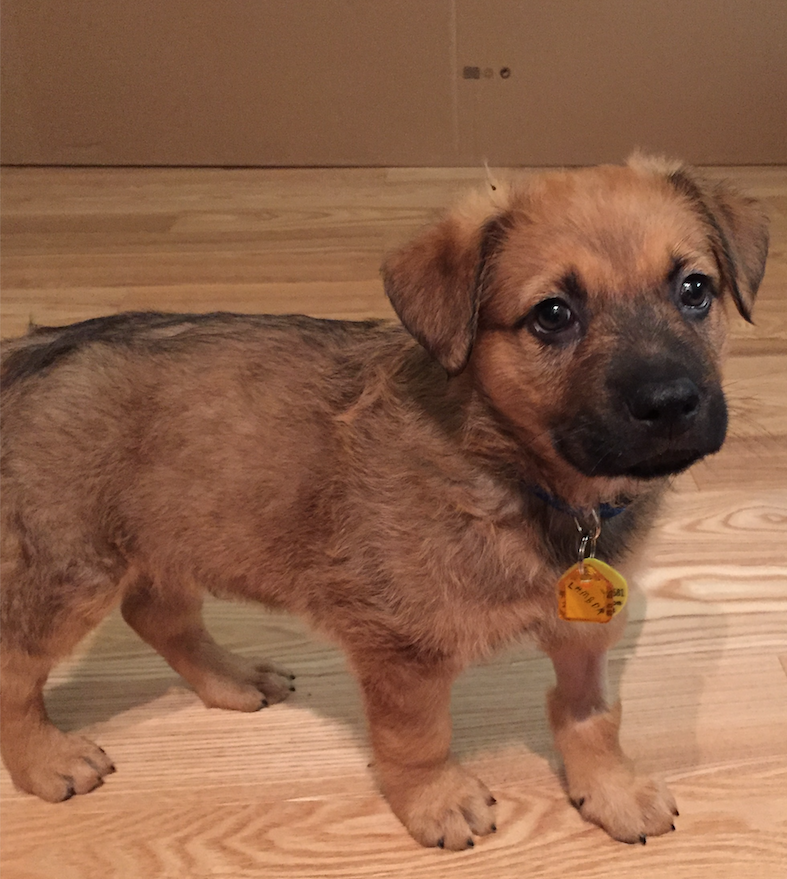

In [659]:
# IPython is simpliest way to view images in Jupyter Notebook

from IPython.display import Image 

Image(filename=str(file_location)) # Image class doesn't support new fangled path names

__PIL is an image processing library__

PIL is short Python Image-processing Library.

We are using a fork (aka, an alternative version based on a parent rep) called `pillow`.

It should be second nature to look at and apply package documentation - [pillow docs](https://pillow.readthedocs.io/en/stable/).

Note - Pillow docs do not use contemporary Python with `pathlib`. Use `pathlib` for your code. 

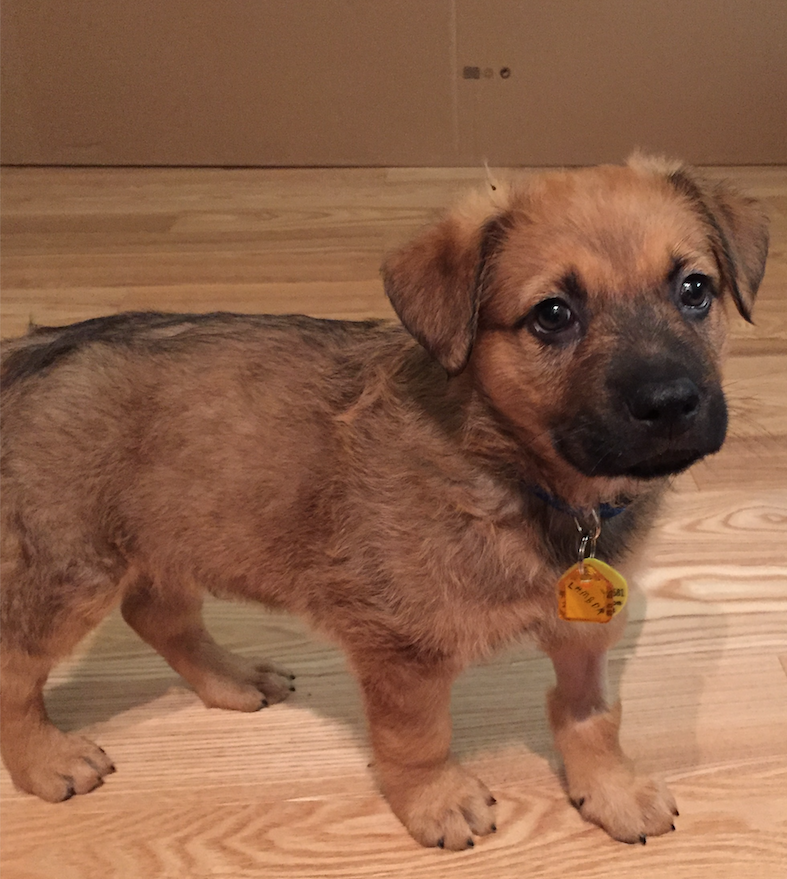

In [660]:
from PIL import Image

image = Image.open(file_location)
image

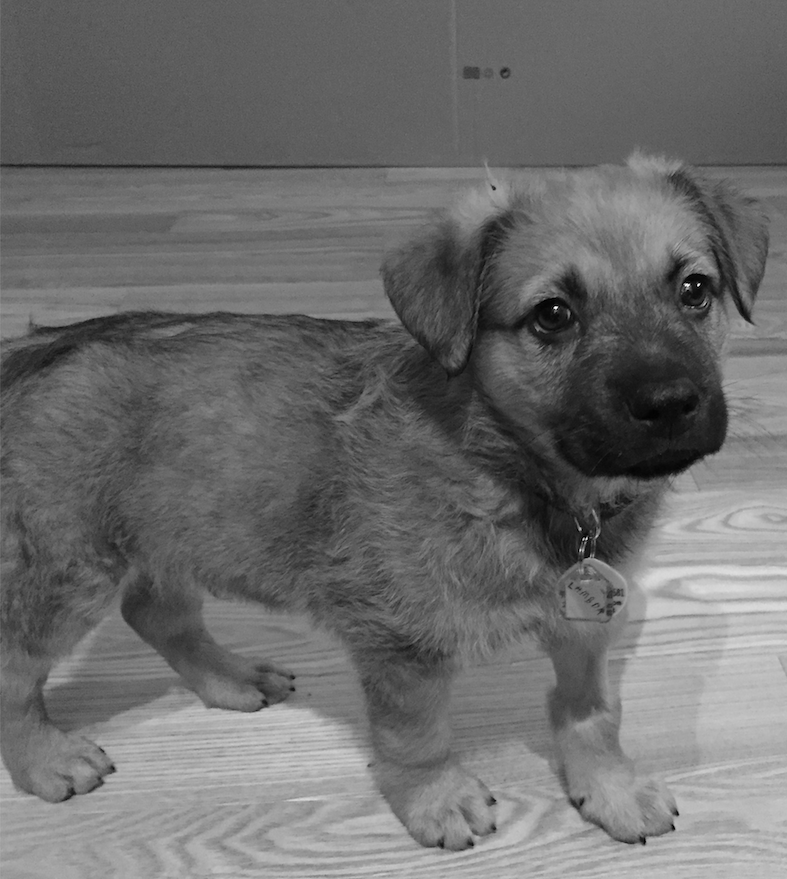

In [661]:
# To simplify the lab will convert everything to grayscale 

image = Image.open(file_location).convert("L") # UsingITU-R 601-2 luma transform: L = R * 299/1000 + G * 587/1000 + B * 114/1000
image

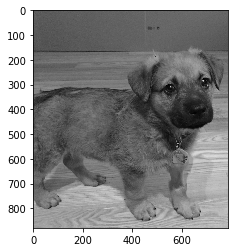

In [662]:
# matplotlib is very common library and uses our friend NumPy
from matplotlib.pyplot import imshow
import numpy as np

%matplotlib inline

imshow(np.asarray(image), 'gray');

BYI (Bring Your Images)
-----

I have provided a number of images that you can use to play around with this project. Of course, you can use any others you want. 

(Remember, however, that all images used in this class and those stored on University equipment must be "safe for work." Keep it G-rated please, with no offensive images popping up on your laptops or machines during lab etc.)

Task 1. Flipping an image horizontally
----

As a first task, create a function called `flip` that flips an image horizontally.

Here are the before and after shots for your reference:

<img src="images/eye.png" width="35%"> 

<img src="images/eye-flip.png" width="35%">

The steps is to create a copy of this image, flip it, and return a copy so that we do not alter the incoming original image. 

To create `flip` function, write code that implements the following steps:

1. Use `size` to define local variables `width` and `height`
1. Use `copy()` to make a copy of the incoming image `image` and save it in a local variable
1. Use `load()` to get the two-dimensional pixel matrix out of the incoming image and the copy of the image. Store these results in two new local variables.
1. To walk over the two-dimensional image, we've learned we need every combination of `x` and `y`. That means we need a nested `for` loop. Create a nested for loop that iterates over all `x` and all `y` values within the `width` and `height` of the image.
1. Within the inner loop, set pixels in the image copy to the appropriate pixel copied from the original image
1. At the end of the function, return the flipped image
<br>
<br>

The only remaining issue is determining which pixel from the original image to copy into the (`x`, `y`) position in the image copy. The `y` index will be the same since we are flipping horizontally. The `x` index in the flipped image is index `width-x-1` from the original image. Trying out a few sample indexes shows that this works well. 

For example, a flipped image with `width=10` has its pixel at `x=0` pulled from index `x=10-0-1=9` in the original image. That's great, because it takes the image from all in the right in the original and copies it to the far left of the copy. Checking the opposite extreme, `x=9` in the flipped image should be `x=10-9-1=0` from the original image.

### 3 Useful Image attributes and methods

To write your `flip` function, you will need three pieces:

1. `image.size` returns a tuple containing the width and height of image `image` so you can write code like this:

    ```python
    width, height = image.size
    ```
      You'll need the width and height to iterate over the pixels of the image.
<br>
<br>
2. `image.copy()` duplicates image `image`.  For our `flip` function, it would be hard to modify the image in place because we would be overwriting pixels we would need to flip later. It's easier to create a copy of the image in flipped position. You can write code like this: `image_duplicate = image.copy()`
<br>
<br>
3. `image.load()` is yet another weird name from PIL that actually returns an object that looks like a two-dimensional matrix, which is really just a list of lists such as `m = [[1,2], [3, 4]]`. When printed, the output looks like a matrix:

    ```python
    m = [[1, 2],
         [3, 4]]
    ```
    To get element `3`, we would use list index expression `m[1][0]` because we want the list at index 1, `m[1]`, and then element 0 within that list. The two-dimensional object returned by `load()` uses similar notation. If we ask for the "matrix" with:

    ```python
    m = image.load()
    ```
    then we  use notation `m[x,y]` to get the pixel at position (`x`, `y`). As is usual with Cartesian coordinates, the `x` index is the horizontal index.
    </ul>

You will use these functions for all of the remaining tasks so keep them in mind.

As always, do not import anything else.
    

In [663]:
def flip(image):
    
    imagec = image.copy()  
    x, y = imagec.size
    
    m = image.load()
    n = imagec.load()
    
    for coordy in range(y):
        for coordx in range(x):
            n[coordx,coordy] = m[x - coordx - 1, coordy]

    return imagec

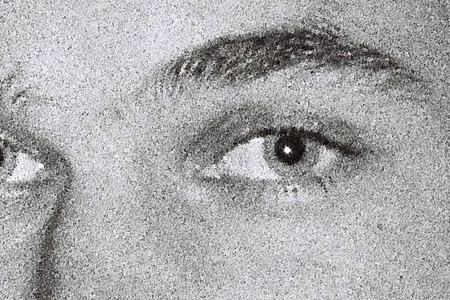

In [664]:
# Visually inspect input
image = Image.open(p / "eye.png")
image

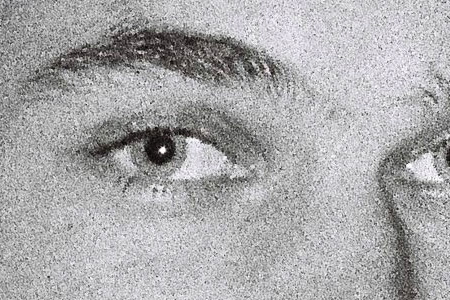

In [665]:
# Visually inspect output
flip(image)

In [666]:
"""
Test code for flip function.
5 points
This cell should NOT give any errors when it is run.
"""

flipped_image_excepted = Image.open(p / "eye-flip.png").convert("L")
image = Image.open(p / "eye.png").convert("L")
flipped_image_actual = flip(image)

# Test against ground truth
assert np.allclose(flipped_image_excepted, flipped_image_actual)

# Test against Pillow library function
assert np.allclose(image.transpose(Image.FLIP_LEFT_RIGHT).convert("L"), flipped_image_actual)

Task 2. Blurring
-----

In this task, we want to blur an image by removing detail. For example:

<img src="images/pcb.png" width="35%"> 

<img src="images/pcb-blur.png" width="35%">

We will do this by creating a new image whose pixels are the average of the surrounding pixels. The pixel in the center of the region is the region to compute as we slide the region around an image. In other words, `pixel[x,y]` is the sum of `pixel[x,y]` and all surrounding pixels divided by 9, the total number of pixels.

Blurring is related to [convolution](https://en.wikipedia.org/wiki/Convolution) which is the heart of a Convolutional Neural Network (CNN), a powerful deep learning (DL) technique. 

### Blurring function

**Define function** The `blur` function to take an `image` parameter, just like the `flip` function in the previous task.  

The `blur` function will accomplish these steps:

- Define local variables `width` and `height`.
- Make a copy of the incoming image `image` and save it in a local variable.
- Get the two-dimensional pixel matrix out of the image copy. Store it in a new local variable called `pixels`.
- Create a nested for loop that iterates over all `x` and all `y` values within the `width` and `height` of the image.
- Within the inner loop:
   - Call to-be-created function `region3x3` with arguments `image`, `x`, and `y` in store into local variable `r`.
   - Set `pixels[x,y]` in the image copy to the result of calling to-be-created function `avg` with an argument of `r`.
- At the end of the function, return the blurred image.

**Define function** `avg` to take an argument called `data` or another of your choice. This will be the list of 9 pixels returned by function `region3x3`. The average of a set of numbers is their total divided by how many numbers there are. Python provides two useful functions here: `sum(data)` and `len(data)`.  (Naturally, `sum` simply walks the list and accumulates values using a pattern we are familiar with.)  Make sure that this function returns an integer using `int(...)`.

### Image regions

Now we need to **define function** `region3x3`.  Have it take three parameters as described above. This function creates and **return a list of nine pixels**. The list includes the center pixel at `x`, `y` and the 8 adjacent pixels at N, S, E, W, ... as shown in the following figure.

<center><img src="images/region.png" width="75%"/></center>

Create a series of assignments that look like this:
 
```python
me = getpixel(image, x, y)
N = getpixel(image, x, y - 1)
...
```

where function `getpixel(image, x, y)` gets the pixel at `x`, `y` in image `image`.  We can't use the more readable expression `pixels[x,y]` in this case, as we'll see in a second. Collect all those pixel values into a list using `[a,b,c,...]` list literal notation and return it. Make sure that this list is a list of integers and exactly 9 elements long and that you keep in mind the order in which you add these pixels to the list. Any function that we create to operate on a region naturally needs to know the order so we can properly extract pixels from the list. For example, my implementation always puts the pixel at `x` and `y` first, then North, etc...

### Safely examining region pixels

We need to **define a function** `getpixel` instead of directly accessing pixels because some of the pixels in our 3x3 region will be outside of the image as we shift the region around. For example, when we start out at `x=0`, `y=0`, 5 of the pixels will be out of range, as shown in the following figure.

<center><img src="images/region-edge.png" width="75%"/></center>

Accessing `pixels[-1,-1]` will trigger:
  
`IndexError: image index out of range`

and stop the program. To avoid this error and provide a suitable definition for the ill-defined pixels on the edges, we will use a function that ensures all indices are within range.

**Define function** `getpixel` with the appropriate parameters. Its functionality is as follows:

* Get the width and height into local variables.
* If the `x` value is less than 0, set it to 0.
* If the `x` value is greater than or equal to the width, set it to the width minus 1 (the last  valid pixel on the far right).
* If the `y` value is less than 0, set it to 0.
* If the `y` value is greater than or equal to the height, set it to the  height minus 1 (the last felt pixel on the bottom).
* Return the pixel at `x`, `y`. You will need to use the `image.load()` function again to get the 2D `pixels` matrix as you did in function `blur`. Make sure you returning pixel and not the coordinates of the pixel from `getpixel`.



In [674]:
from typing import Sequence

def avg(data: Sequence[float]) -> int:
    "Special average function that always returns integer to avoid numerical precision errors."
    
    return int(sum(data)/len(data))

In [675]:
"""
Test code for avg function.
1 points
This cell should NOT give any errors when it is run.
"""

from statistics import mean

assert type(avg([1,2,3,4,5])) == int
assert avg([1,2,3,4,5]) == 3 == mean([1,2,3,4,5])

In [676]:
def get_pixel(image, x: int, y: int) -> int:

    width, height = image.size
    
    imagec = image
    pixels = imagec.load()

    newx = 0
    newy = 0
    
    if x < 0:
        newx = 0
    elif x >= (width - 1):
        newx = width -1
    else:
        newx = x
    
    if y < 0:
        newy = 0
    elif y >= (height - 1):
        newy = height - 1
    else:
        newy = y
    
    pixel = pixels[newx, newy]
    
    return pixel

In [677]:
"""
Test code for get_pixel function.
5 points
This cell should NOT give any errors when it is run.
"""

image = Image.open(p / "pcb.png").convert("L")

assert get_pixel(image, 0, 0)   == 222
assert get_pixel(image, 0, 1)   == 181
assert get_pixel(image, 10, 20) == 44

In [678]:
def region3x3(image, x, y):
    
    me = get_pixel(image,x,y)   
    N = get_pixel(image,x,y-1)
    S = get_pixel(image,x,y+1) 
    E = get_pixel(image,x+1,y) 
    W = get_pixel(image,x-1,y) 
    NW = get_pixel(image,x-1,y-1) 
    NE = get_pixel(image,x+1,y-1) 
    SE = get_pixel(image,x+1,y+1) 
    SW = get_pixel(image,x-1,y+1) 
    
    return (me, N, S, E, W, NW, NE, SE, SW)

In [679]:
"""
Test code for region3x3 function.
3 points
This cell should NOT give any errors when it is run.
"""

image = Image.open(p / "pcb.png").convert("L")

assert region3x3(image, 0, 0)  == (222, 222, 181, 187, 222, 222, 187, 234, 181)
assert region3x3(image, 7, 12) == (31, 31, 32, 167, 176, 166, 165, 164, 175)

In [680]:
def blur(image):

    imagec = image.copy()
    m = imagec.load()
    
    width, height = image.size
    
    for y in range(height):
        for x in range(width):
            r = region3x3(image,x,y)
            m[x,y] = avg(r)
    
    output = imagec
    
    return output

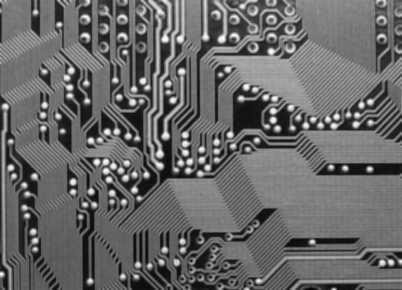

In [681]:
# Visually inspect your results

image = Image.open(p / "pcb.png").convert("L") 
blur(image)

In [683]:
"""
Test code for blur function.
5 points
This cell should NOT give any errors when it is run.
"""

blur_image_excepted = Image.open(p / "pcb-blur.png").convert("L")
image = Image.open(p / "pcb.png").convert("L") 
blur_image_actual = blur(image)

# Test against ground truth
assert np.allclose(blur_image_excepted, blur_image_actual)

Task 3. Removing noise
----


For our next task, we are going to de-noise (remove noise) from an image as shown in the following four figures: 

<table border="0">
<tr>
<td><img src="images/guesswho.png" width="150"><td><img src="images/guesswho-denoise.png" width="150">
<tr>
<td><img src="images/guesswho-denoise-denoise.png" width="150"><td><img src="images/obama.png" width="150">
</table>

Our denoising function will do a shockingly good job considering the simplicity of our approach. 
 
To blur, we used the average of all pixels in the region. To denoise, we will use the [median](http://en.wikipedia.org/wiki/Median), which is just the middle value in a list of ordered numbers (or average of two middle if there are an even number of values).
 
Believe it or not, we can implement de-noise by copying our blur code  and then changing a few lines. We have to remove the no-longer-used `avg` function and replace it with a `med` function, our version of median.  Of course, instead of calling `blur`, we'll call function `denoise` with the usual `image` argument. The only difference between `denoise` and `blur` is that you will set the pixel to the `med` not `avg`.  

Hint: you need to tweak one statement in the inner loop that moves over all pixel values.

In [684]:
def med(data): 
    "Special median function that always returns integer to avoid numerical precision errors."
    
    tempList = []
    
    for each in data:
        tempList.append(each)
        
    tempList.sort()
    div = int(len(tempList)/2)
    median = 0
    
    if len(tempList) % 2 == 0:
        median = (tempList[div] + tempList[div-1])/2
    else:
        median = tempList[div]
        
    return median

In [685]:
"""
Test code for med function.
1 points
This cell should NOT give any errors when it is run.
"""

from statistics import median

data = [1, 5, 4, 2, 3]
assert type(med(data)) == int
assert med(data) == 3 == median(data)

In [686]:
def denoise(image):
    
    imagec = image.copy()
    m = imagec.load()
    
    width, height = image.size
    
    for y in range(height):
        for x in range(width):
            r = region3x3(image,x,y)
            m[x,y] = med(r)
    
    output = imagec
    
    return output

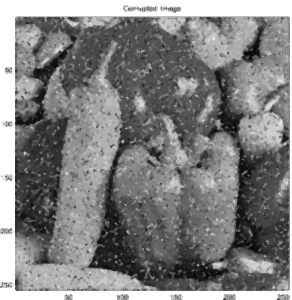

In [687]:
# Visually inspect your results

image = Image.open(p / "veggies_noisy.png").convert("L") 
denoise(image)

# # It is clearer (pun intended) if you do it a couple of times
# for _ in range(5):
#     image = denoise(image)
# image

In [688]:
"""
Test code for denoise function.
5 points
This cell should NOT give any errors when it is run.
"""

denoise_image_excepted = Image.open(p / "veggies_denoised.png").convert("L")
image = Image.open(p / "veggies_noisy.png").convert("L")
denoise_image_actual = denoise(image)

# Test against ground truth
assert np.allclose(denoise_image_excepted, denoise_image_actual)

Task 4. Re-factoring to improve code quality
----

As I mentioned in the last task, blur and denoise are virtually identical, meaning that we have a lot of code in common. 

One of the most important principles of computer science is to reduce code duplication. We always want exactly one place to change a particular bit of functionality.   In this case, functions `blur` and `denoise` are identical except for the function called to compute a new pixel in the image copy from a 3x3 region in the original (`avg` or `med`).

The only tricky part is to create a single generic `filter` function that can reproduce the functionality we have in functions `blur` and `denoise`.

* Copy the body of function `blur` into your new `filter` function.
* Replace the call to `avg` to the function that is being passed in.

As we discussed in class, functions are objects in Python just like any strings, lists, and so on. That means we can pass them around as function arguments. 

To use our new generic `filter` function, we pass it an image as usual but also the name of a function:

```python
blurred  = filter(image, function=avg)
denoised = filter(image, function=med)
```

In [689]:
def filter(image, function):
    
    imagec = image.copy()
    m = imagec.load()
    
    width, height = image.size
    
    for y in range(height):
        for x in range(width):
            r = region3x3(image,x,y)
            m[x,y] = function(r)
                   
    output = imagec
    
    return output

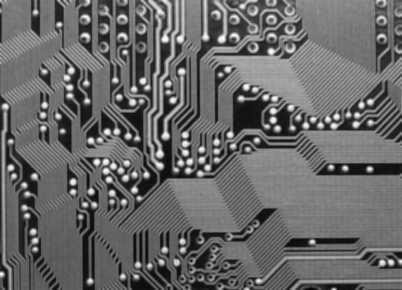

In [690]:
# Visually inspect your results

image = Image.open(p / "pcb.png").convert("L") 
filter(image, function=avg)

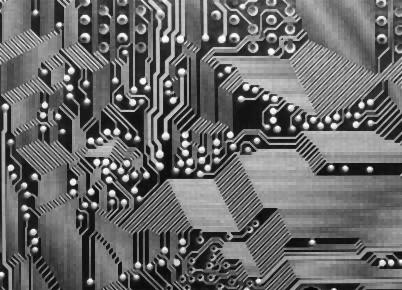

In [691]:
# Visually inspect your results

image = Image.open(p / "pcb.png").convert("L") 
filter(image, function=med)

In [693]:
"""
Test code for filter function.
3 points
This cell should NOT give any errors when it is run.
"""

# Test that filter can blur
blur_image_excepted = Image.open(p / "pcb-blur.png").convert("L")
image = Image.open(p / "pcb.png").convert("L") 
blur_image_actual = filter(image, function=avg)
assert np.allclose(blur_image_excepted, blur_image_actual)

# Test that filter can denoise
denoise_image_excepted = Image.open(p / "veggies_denoised.png").convert("L")
image = Image.open(p / "veggies_noisy.png").convert("L")
denoise_image_actual = filter(image, function=med)
assert np.allclose(denoise_image_excepted, denoise_image_actual)

## Task 5. Highlighting image edges

Now that we have some basic machinery available to us in the form of some common functions, we can easily build new functionality. In this task, we want to highlight edges found within an image.  It is surprisingly easy to capture all of the important edges in an image:

<img src="images/jeep.png" width="300"> <img src="images/jeep-edges.png" width="300">

The mechanism we're going to use is derived from some serious calculus kung fu called the [Laplacian](https://en.wikipedia.org/wiki/Laplace_operator), but which, in the end, reduces to 4 additions and a subtraction!  

The Laplacian is very important for constrained optimization, constrained optimization is the heart of machine learning.

The intuition behind the Laplacian is that abrupt changes in brightness indicate edges, such as the transition from the darkness of a uniform to the brightness of a windshield edge.  As we did for blurring and denoising, we are going to slide a 3x3 region around the image to create new pixels at each `x`, `y`. That  means we can reuse our `filter` function---we just need a `laplace` function to pass to `filter`.

**Create function** `laplace` that takes region `data` as an argument as usual. Have the function body  return the sum of the North, South, East, and West pixels minus 4 times the middle pixel from our usual region:

<center><img src="images/3x3-region.png" width="35%"/></center>

That computation effectively compares the strength of the current pixel with those around it. For example, imagine a region centered over a vertical white line. The region might look like:

<img src="images/vertical-line-region.png" width="35%">

The `laplace` function would return 255+255+0+0 - 4 * 255 = -510. 

For those familiar with calculus, we are using the second partial derivative (e.g., acceleration) in x and y directions. The first derivative would detect edges even for gradual changes but the second derivative detects only really sharp changes. For a pixel fetching function <i>function</i> operating on a 3x3 region around <i>(x,y)</i>, "applying the <i>Laplacian</i>" means computing a filtered image pixel at <i>x,y</i> as:<br><i>f(x + 1,y) + f(x - 1,y) + f(x,y + 1) + f(x,y - 1) - 4f(x, y)</i><br>where <i>f(x,y)</i> is equivalent to our `pixels[x,y]`.

Be aware of something that Pillow is doing for us automatically when we store values into an image with `pixels[x,y] = v`.  If `v` is out of range 0..255, Pillow clips `v`. So, for example, `pixels[x,y] = -510` behaves like `pixels[x,y] = 0` and `pixels[x,y] = 510` behaves like `pixels[x,y] = 255`. It doesn't affect edge detection or any of our other operations in future tasks but I wanted to point out that in a more advanced class we would <b>scale</b> these pixel values instead of clipping them. Clipping has the effect of reducing contrast.

Compare that to the opposite extreme where values are almost the same:

<img src="images/flat-region.png" width="35%">

The `laplace` function would return 18+19+15+21 - 4 * 10 = 33.

Once you have implemented your `laplace` function, give it a try on images `obama.png`. It actually does a really good job capturing Obama's outline:

<center><img src="images/obama.png" width="35%"/></center>

<center><img src="images/obama-edges.png" width="35%"/></center>

In [694]:
def laplace(data):

    new_pixel = sum(data[1:5]) - 4*data[0]

    return new_pixel

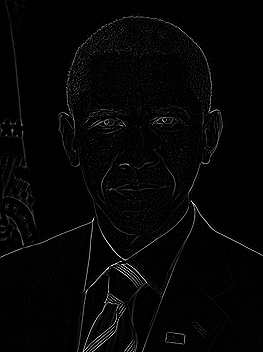

In [695]:
# Visually inspect your results

image = Image.open(p / "obama.png").convert("L") 
filter(image, function=laplace)

In [696]:
"""
Test code for laplace function.
3 points
This cell should NOT give any errors when it is run.
"""

data = [10, 18, 19, 15, 21]
assert laplace(data) == 33

edges_image_excepted = Image.open(p / "obama-edges.png").convert("L")
image = Image.open(p / "obama.png").convert("L") 
edges_image_actual = filter(image, function=laplace)

# Test against ground truth
assert np.allclose(edges_image_excepted, edges_image_actual)

<br>
<br> 
<br>

----